# IMST E-111 Coding Challenge Fall 2021
#### Make sure to include any relevant code when providing all answers. 
Save this as a `.ipynb` file with all results visible and send it to Vasya when you're done.<br>
Enter your code into *this* notebook **AND** Enter your name in the following cell (`5 pts`)

#### Always show your work, and if there is a question being asked be sure to answer it.
You can answer with a comment, print statement or markdown cell <br>(remember a comment is preceded by a hash symbol `#here is my comment`)


### Challenge is out of 150 points 
  * **100 points for the main challenge**
  * **50 bonus points for extra credit**
 
#### Notes
* Dont worry about missing values, they're addressed in the Extra Credit portion

#### Submission
* send this completed .ipynb (with all cells run) to vasyatheta@gmail.com with your first and last name in the filename (e.g., `Vasya_Selsov_CodingChallenge_S2022.ipynb`)
* If you cant find the location of this notebook you can run the following to find your notebook:<br> 
`import os`<br>
`print(os.getcwd())`<br>
Drag and drop that .ipynb file into your email

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('codingdata.csv')

In [ ]:
# df.Email_Campaign_Type.drop_duplicates()

In [3]:
tenrecord = df.head(10)


### 1. Load your Data and Take a Look

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Load the training data (found in the same github repo as this notebook) into this notebook using Pandas. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`5 pts`)** Show the first 10 lines of the data.

In [4]:
tenrecord


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


### 2.  Define and describe your target variable
The `email status` column contains three values with the following definitions.  
`0=ignored` `1=read` and `2=converted`
* Ignored means that the customer did not interact with the email
* Read means that a customer opened the email
* Converted means that the customer clicked on the link for the product page within the email. 

The company considers an `email_status` of `2` as a conversion, (statuses 0 and 1 are non-conversions).

In [5]:
email_status = df[df.Email_Status==2]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  **(`10 pts`)** How many conversions are in this dataset?<br>

In [6]:
email_status.shape[0]

2373

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.**  **(`10 pts`)** What percent of all emails resulted in a conversion?<br><i>Show output you used to determine this answer and provide your answer as a comment</i>

In [7]:
mail_percentage = email_status.shape[0] * 100 / len(df)


In [8]:
mail_percentage

3.4716837593082968

### 3 Exploration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** The `Email_Campaign_Type` column captures the campaign under which the email was sent. A campaign is a marketing strategy.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.**  **(`15 pts`)** Which campaign had the most conversions?

In [9]:
EmailCampaignType = email_status.groupby('Email_Campaign_Type').size()


In [10]:
EmailCampaignType #Which campaign had the most conversions?

Email_Campaign_Type
1     173
2     712
3    1488
dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.**  **(`15 pts`)** Which campaign has the highest conversion rate?

In [20]:
EmailCampaignTypeval=EmailCampaignType.idxmax()

3

In [16]:
EmailCampaignTypeval, EmailCampaignType.max()  #Which campaign has the highest conversion rate?

(3, 1488)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b**.
`Total_Past_Communications` is a count of the number of times the customer has been contacted prior to the current email. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`11 pts`)** Create a box plot showing the distribution of `Total_Past_Communications` by `conversion`. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii** **(`6 pts`)** How do conversions relate to the number of times a customer had been emailed?  Set the title to something that briefly summarizes this relationship. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`2 pts`)** Set the x-label to be `Email Status` and the y-label to be `Previous Emails`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv** **(`1 pts`)** Prevent the default text `'Boxplot grouped by conversion'` from displaying in the title of the boxplot, and do not show extreme values / outliers.  Then show your plot!

_note: the output should be one boxplot, rather than one boxplot per sub-question_

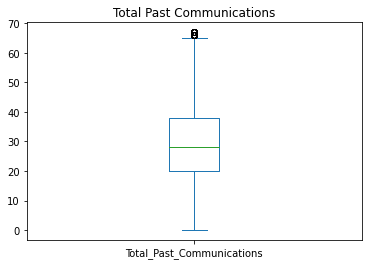

In [26]:
df['Total_Past_Communications'].plot(kind='box', title='Total Past Communications')
plt.show()

***
You're done!  You can relax and submit this assignment! <br>If you're feeling ambitious, you can try your hand at the _extra credit_ portion below.  

***
# Extra Credit: Build, Interpret and Assess a Machine Learning Model to Predict Conversion Rate

**1.  Data Cleaning & Prep** 
We'll be encoding a categorical variable, joining it to all of our numerical variables and generating a train-test split to train and test our model.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Which columns are categorical columns and which are numerical? Create a list of categorical column names and a list of numerical column names. Ignore the following columns: `Email_ID`, `Email_Status`, `conversion`.  You should have ten columns to categorize.  Save each list to a variable (e.g., `my_var = ['a', 'b', 'c']`)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`2.5 pts`)** A few of the columns have missing values.  Let's just drop them.  To do that you can run `df.dropna(inplace=True)` where `df` is the name of your dataframe. That's it, this one's easy, no tricks.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`10 pts`)** Add Dummy Variables!   (Hint: Follow the code in chapter 4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** Using `pd.get_dummies(<your_column_of_data>, drop_first=True)`, create a new dataframe that contains the dummy-variable version of `Email_Campaign_Type`. <br>**Note/Warning:** <i>This is a bit different than we did in class since we use the `drop_first` argument.  `drop_first` means:  Don't encode Campaign 1, just tell me how good Campaigns 2 & 3 are in relation to Campaign 1.  This is necessary for the model to produce sensible results</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** Rename the columns of this dataframe to be `'Campaign_2','Campaign_3'`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** Concatenate this dataframe to the original dataframe.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv.** Create a variable called `all_features` that is a list of all the variables we want to use in our model.  This will be all numerical variables and the dummy variables `'Campaign_2','Campaign_3'`.  Print the variable (i.e., `print(all_features)`).  <br>


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.** **(`7.5 pts`)** Split the dataframe into 80% training data and 20% testing data using the `train_test_split` function (see section 3 of the notebook from Chapter 8 for an example of how to do this.) When you pass the data to be split, be sure to add an intercept!  
To do this simply pass `sm.add_constant(df[all_features])` (where `sm` is the alias for `statsmodels.api`) instead of just `df[all_features]` (in other words, `df[all_features]` is your modeling dataframe subset to the features you will use to model).  
Finally, add the following argument to train_test_split:  `random_state=42`

*print the number of rows and columns in all the dataframes you created in this step*

**2.  Build, interpret and score a logistic regression model!** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Build a Logistic Regression using statsmodels (statsmodels.api) as in Chapter 3.  Only include the *train* data you created in question 1d.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  Using the Model Summary answer the following questions <br>Remember:  `Campaign_2` & `Campaign_3` are encoded in relation to `Campaign_1`, when interpretting them remember to mention that their effect is relative to `Campaign_1`).
<br>You can provide your answer as a comment (`# Anything following a hash mark is a comment`) or in any other manner you like.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`3 pts`)**which variables have a statistically significant positive correlation with the target
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** **(`3 pts`)**
which variables have a statistically significant negative correlation with the target?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`4 pts`)**
What suggestions can you make based on these results? 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`5 pts`)** Use your model to get predictions using the test data.  Remember that your fit model is the result of the `.fit()` call (e.g., `my_fit = my_model.fit()`).  The resulting object has a `.predict` method (e.g., `my_fit.predict()`) that will generate predictions using your model on the specified data.  <br>Get predictions by applying the model you just fit to the _test_ data.  Save the predictions to a variable.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.**  **(`5 pts`)** The ROC AUC score informs you as to how good your model is at telling which emails are more likely to result in conversions than others. You can use the Scikit-Learn function `sklearn.metrics.roc_auc_score` to compute this. This function has two inputs: predictions and the actual value from the data.  You already have both of these variables. *You may want to take a look at Chapter 8's Notebook for more details on this metric*